In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
cars = pd.read_csv('data.csv')

In [4]:
cars

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


<Axes: >

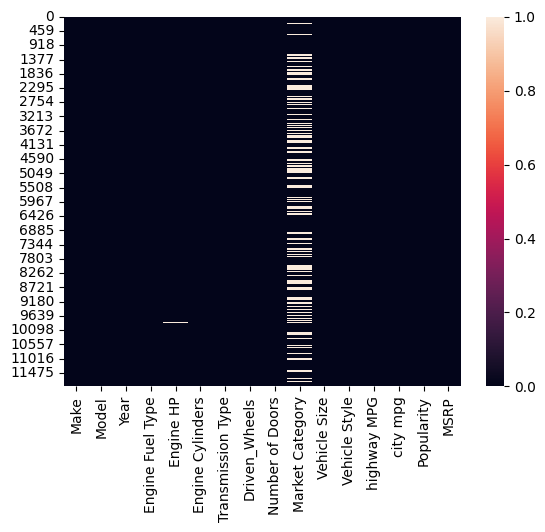

In [5]:
cars.isnull().sum()
sns.heatmap(cars.isnull())

In [8]:
# Fill missing Engine HP with mean
cars.fillna(({'Engine HP':cars['Engine HP'].mean()}), inplace=True)

# Fill missing Engine Cylinders with median
cars.fillna(({'Engine Cylinders' :cars['Engine Cylinders'].median()}), inplace=True)

# Fill missing Number of Doors with mode
cars.fillna(({'Number of Doors':cars['Number of Doors'].mode()[0]}), inplace=True)

In [12]:
cars.fillna(({'Market Category':'Unknown'}), inplace=True)


In [16]:
# Fill Engine Fuel Type with the most common value
cars.fillna(({'Engine Fuel Type':cars['Engine Fuel Type'].mode()[0]}), inplace=True)


# **Top 10 car makers**

<Axes: ylabel='Make'>

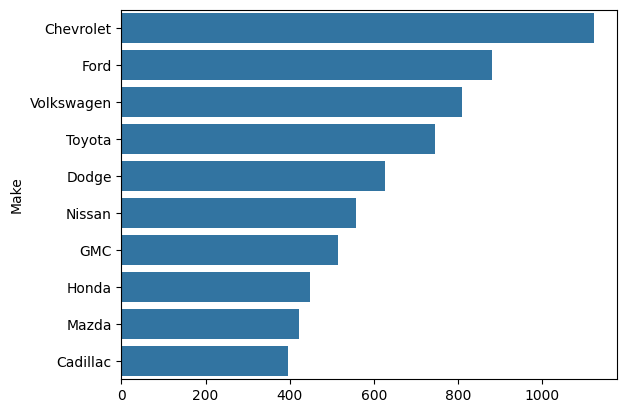

In [18]:
top_makes = cars['Make'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index)


## **Distribution of engine horsepower**

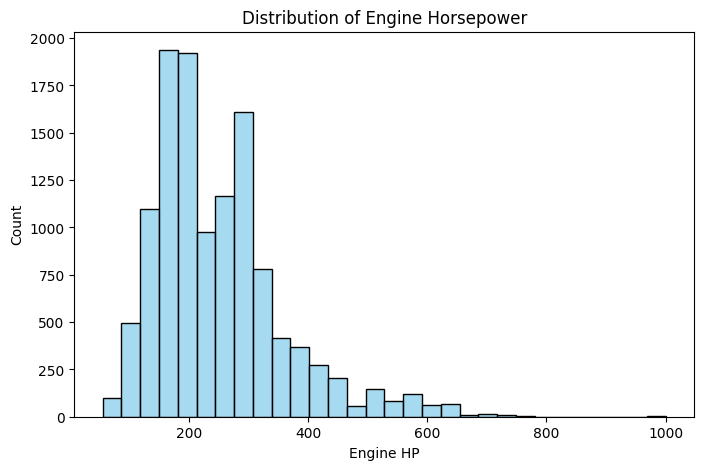

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(cars['Engine HP'], bins=30, color='skyblue')
plt.title('Distribution of Engine Horsepower')
plt.xlabel('Engine HP')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-1101664467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmission Type', data=cars, palette='viridis')


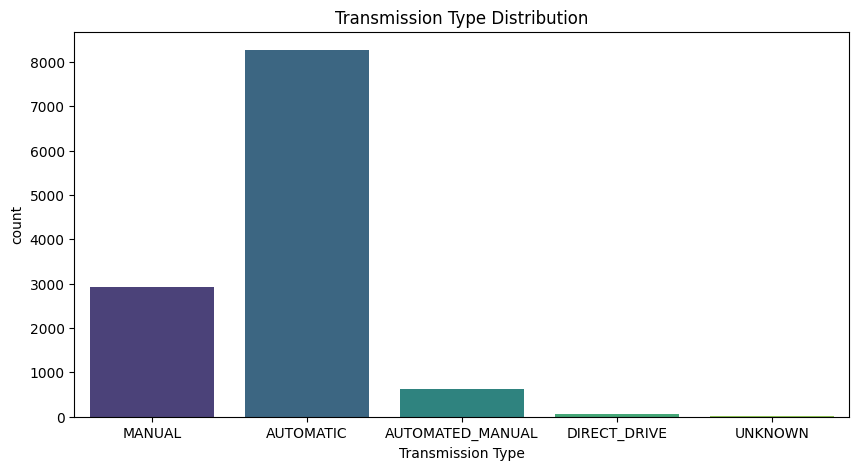

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='Transmission Type', data=cars, palette='viridis')
plt.title('Transmission Type Distribution')
plt.show()

## **It is visible that automatic cars are leading the market.**

/tmp/ipython-input-2274180126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Driven_Wheels', data=cars, palette='pastel')


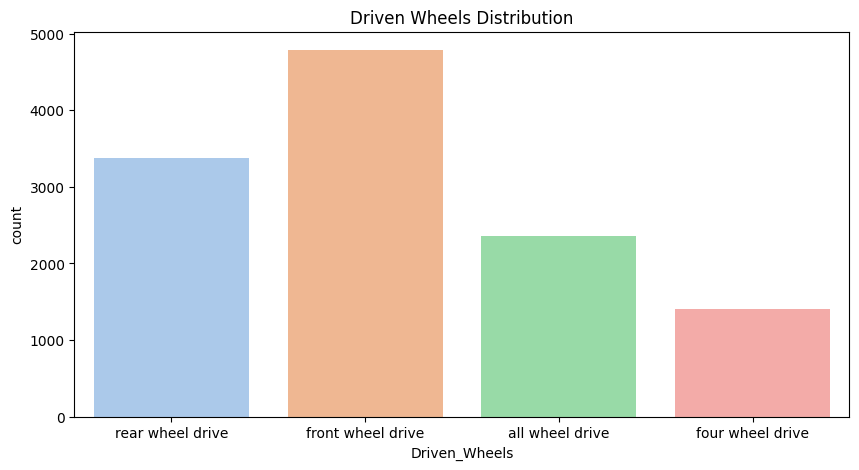

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Driven_Wheels', data=cars, palette='pastel')
plt.title('Driven Wheels Distribution')
plt.show()

## **It is shown that front wheel drive is the most occured type.**

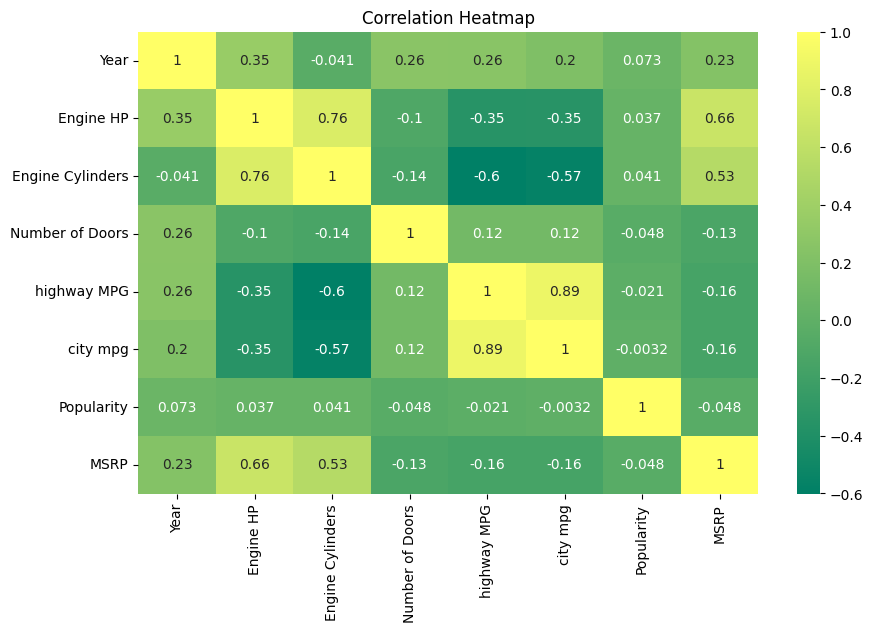

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(cars.select_dtypes(include='number').corr(), annot=True, cmap='summer')
plt.title('Correlation Heatmap')
plt.show()

**This shows the correlation between numerical columns**

/tmp/ipython-input-2935254226.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Vehicle Size', y='MSRP', data=cars, estimator='mean', ci=None)


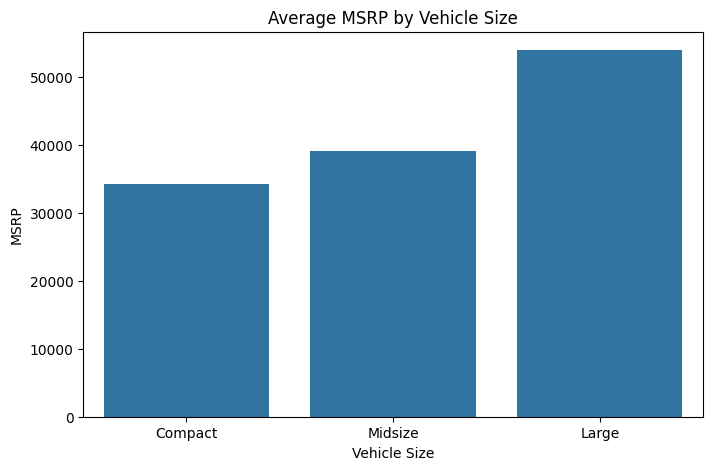

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='Vehicle Size', y='MSRP', data=cars, estimator='mean', ci=None)
plt.title('Average MSRP by Vehicle Size')
plt.show()


### **the MSRP is getting high with the vehicle size.**

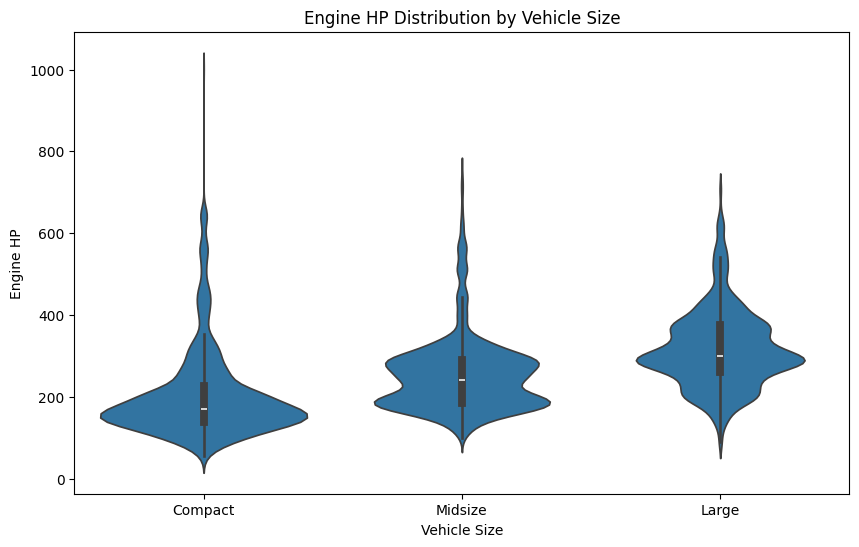

In [37]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Vehicle Size', y='Engine HP', data=cars)
plt.title('Engine HP Distribution by Vehicle Size')
plt.show()


## **The average engine HP is higher with the bigger vehicle size.**

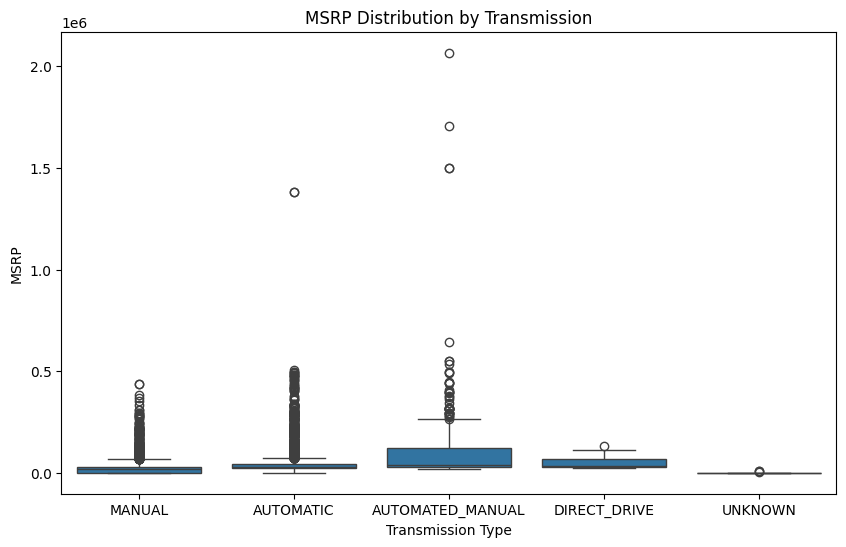

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Transmission Type', y='MSRP', data=cars)
plt.title('MSRP Distribution by Transmission')
plt.show()


## **We can see many outliers in the graph.**

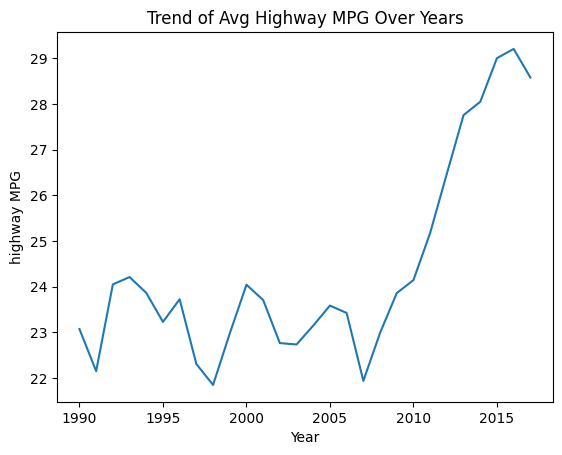

In [39]:
yearly = cars.groupby('Year')['highway MPG'].mean().reset_index()
sns.lineplot(x='Year', y='highway MPG', data=yearly)
plt.title('Trend of Avg Highway MPG Over Years')
plt.show()


## **It is seen that over the years, highway MPG is increasing.**

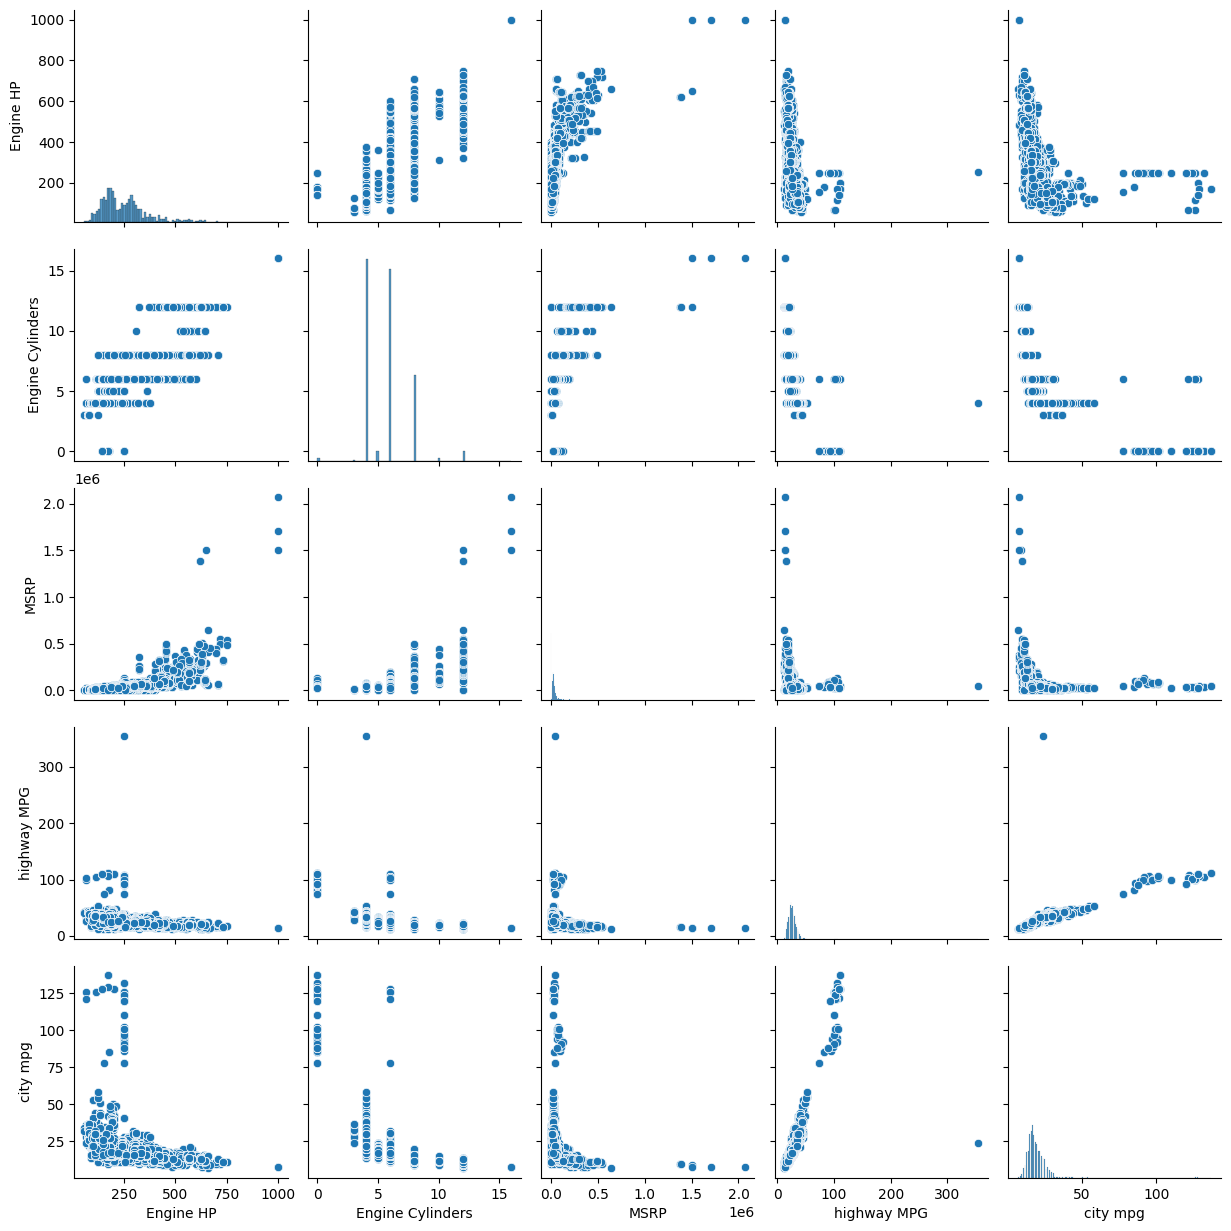

In [40]:
sns.pairplot(cars[['Engine HP','Engine Cylinders','MSRP','highway MPG','city mpg']])
plt.show()


## **The pairplot shows the relationship between multiple features of data.**

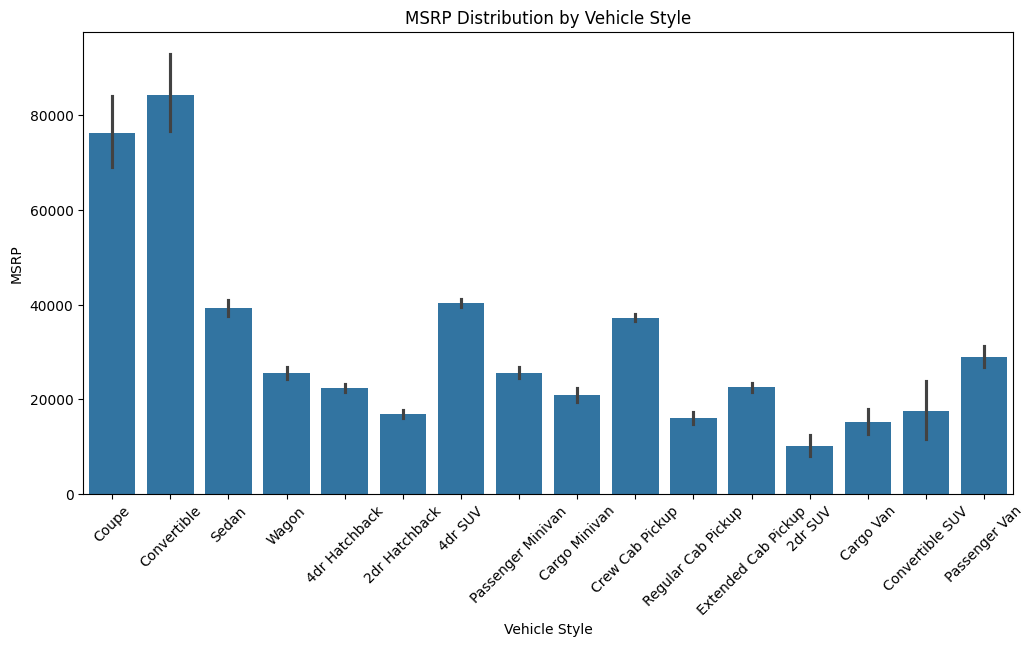

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x='Vehicle Style', y='MSRP', data=cars)
plt.title('MSRP Distribution by Vehicle Style')
plt.xticks(rotation=45)
plt.show()


## **This graph shows MSRP among various types of cars.**

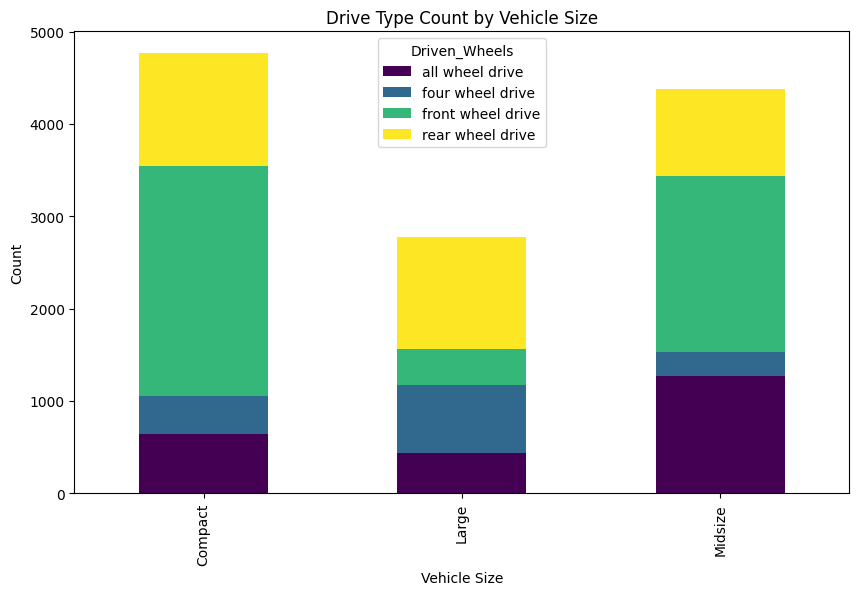

In [45]:
drive_size = pd.crosstab(cars['Vehicle Size'], cars['Driven_Wheels'])
drive_size.plot(
    kind='bar', stacked=True, figsize=(10,6),
    colormap='viridis'
)
plt.title('Drive Type Count by Vehicle Size')
plt.ylabel('Count')
plt.show()
